<a href="https://colab.research.google.com/github/NsiriRoua/Pre_trained_Models/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

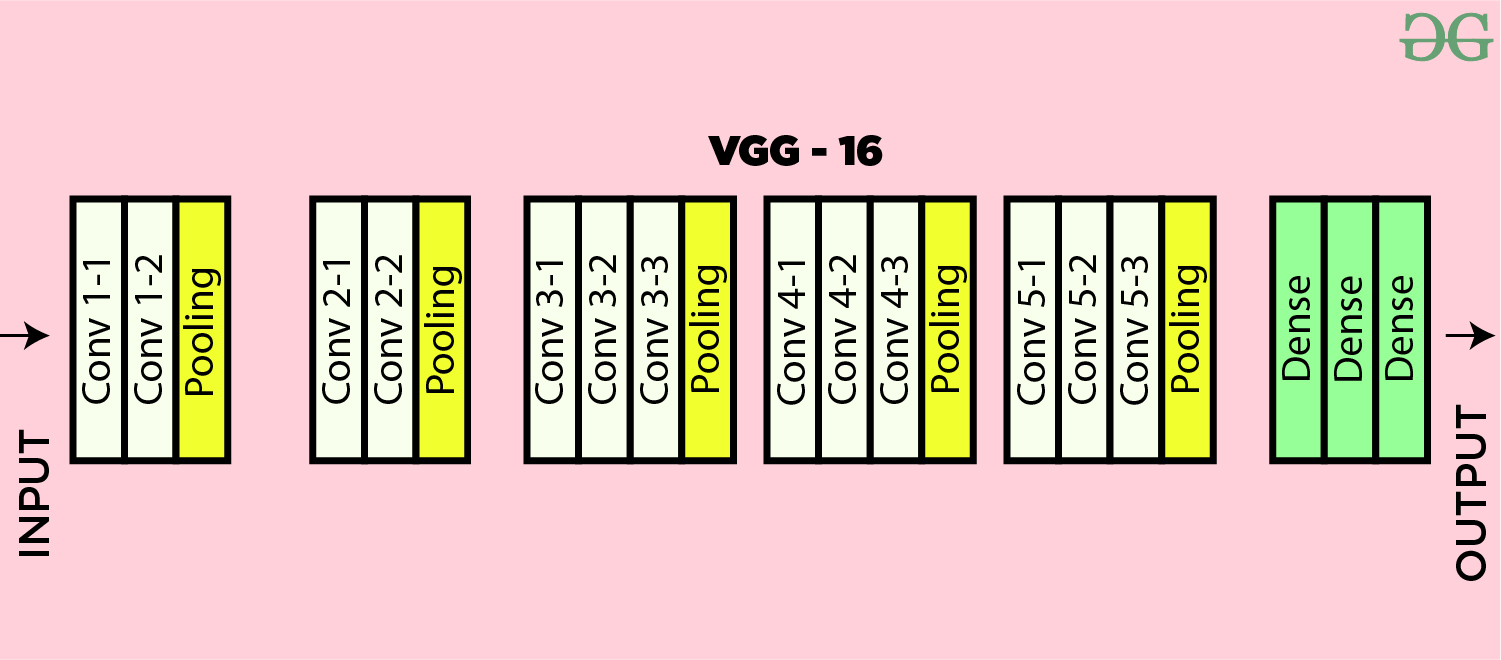

In [3]:
from tensorflow.keras.applications import VGG16

**Load the vgg16 model on the ImageNe Dataset**

In [4]:
model=VGG16(weights='imagenet')

553467904/553467096 [==============================] - 4s 0us/step


Let's take a look to our model

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Input Dimensions**

We are expecting an (224,224,3) as input image

**Output shape**

Our model will return a prediction of 1000 shape

**Loading images**

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(image_path):
  image=plt.imread(image_path)
  plt.imshow(image)
  print(image.shape)

(1200, 1800, 3)


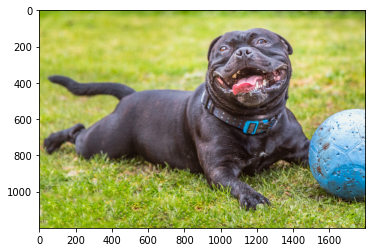

In [8]:
show_image('/content/drive/MyDrive/Colab Notebooks/Images/happy_dog.jpg')

**Preprocessing images**

In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import  image as image_utils

def load_and_process_image(image_path):
  #Let's print the shape
  print('Original image shape: ', mpimg.imread(image_path).shape)
  #let's load our image and changing the input shape to (224,224)
  image=image_utils.load_img(image_path,target_size=(224,224))
  #Let's convert the image from a PIL fromat to a numpy array
  image=image_utils.img_to_array(image)
  #Let's reshape our image
  image=image.reshape(1,224,224,3)
  #Let's preprocess image to align with original ImageNet dataset
  image=preprocess_input(image)
  
  
  return image

In [20]:
preprocessed_image=load_and_process_image('/content/drive/MyDrive/Colab Notebooks/Images/happy_dog.jpg')

Original image shape:  (1200, 1800, 3)


**Let's make a prediction**

In [22]:
from tensorflow.keras.applications.vgg16 import decode_predictions
def readable_prediction(image_path):
  #Show image
  show_image(image_path)
  #Load and pre-process image
  image=load_and_process_image(image_path)
  #Make prediction 
  predictions=model.predict(image)
  #Print predictions in readable form 
  print('Predicted:',decode_predictions(predictions,top=4))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.45098138), ('n02110958', 'pug', 0.32263243), ('n02099712', 'Labrador_retriever', 0.09343183)]]


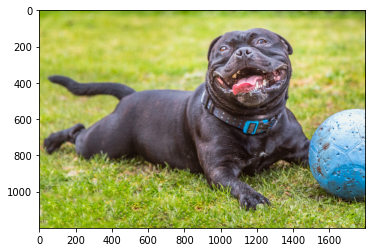

In [24]:
readable_prediction('/content/drive/MyDrive/Colab Notebooks/Images/happy_dog.jpg')

**Let's take only dogs**

categories 151 through 268 and cats are categories 281 through 285.

**Doogy function**

In [31]:
import numpy as np 
def Doggy(image_path):
  show_image(image_path)
  image=load_and_process_image(image_path)
  preds=model.predict(image)
  if 151<=np.argmax(preds)<=268:
    print('its a dog !')
  elif 281<=np.argmax(preds)<=285:
      print('its a cat')
  

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
its a dog !


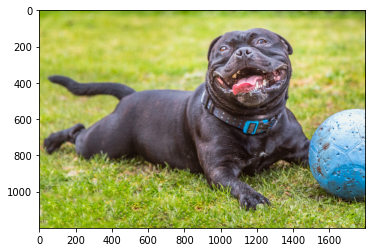

In [32]:
Doggy('/content/drive/MyDrive/Colab Notebooks/Images/happy_dog.jpg')

**Transfer Learning**

In [34]:
from tensorflow import keras
base_model=keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [35]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
base_model.trainable=False

**Add New Layers**

In [38]:
inputs=keras.Input(shape=(224,224,3))
x=base_model(inputs,training=False)
x=keras.layers.GlobalAveragePooling2D()(x)
#Output layer for binary classification
outputs=keras.layers.Dense(1)(x)
model=keras.Model(inputs,outputs)

In [39]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


**Compile the Model**

In [41]:
#We have binary problem , we will use binary_cross_entropy
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=[keras.metrics.BinaryAccuracy()])

**Data Augmentation**

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    samplewise_center=True, #To set each samplr mean to 0
    rotation_range=10, #Randomly rotate images in the range(degress, 0 to 180) 
    zoom_range=0.1,#Randomly zoom image
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)